In [111]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats
import joblib
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import GroupShuffleSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [112]:
%matplotlib inline

In [113]:
def rmse(y_true, y_pred):
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    return rmse

def lcc(y_true, y_pred):
    lcc, _ = stats.pearsonr(y_true, y_pred)
    return lcc

def srocc(y_true, y_pred):
    srocc, _ = stats.spearmanr(y_true, y_pred)
    return srocc

In [114]:
def accuracy(y_true, y_pred):
    ratio = abs(y_true - y_pred) / y_true
    return 1 - np.mean(ratio)

In [115]:
scorer = {}
scorer['rmse'] = metrics.make_scorer(rmse, greater_is_better=False)
scorer['lcc'] = metrics.make_scorer(lcc, greater_is_better=True)
scorer['srocc'] = metrics.make_scorer(srocc, greater_is_better=True)
scorer

{'rmse': make_scorer(rmse, greater_is_better=False),
 'lcc': make_scorer(lcc),
 'srocc': make_scorer(srocc)}

In [116]:
features = pd.read_pickle('features.pkl')
labels = pd.read_pickle('labels.pkl')

In [117]:
features = features.drop(['Blockloss'], axis = 1)

In [118]:
features.head()

,msssim,psnr,psnrhvs,psnrhvsm,ssim,vifp,Blockiness,Blur,Contrast,Exposure(bri),Flickering,Interlace,Noise,SA,TA
G10BoatInPark_ERP_4096x2048_fps30_qp27_14547k.mp4,0.993424,41.829451,39.401728,43.855814,0.989905,0.818723,0.918001,6.318822,56.274408,122.973648,0.973981,0.004543,0.385048,48.017774,12.572215
G10BoatInPark_ERP_4096x2048_fps30_qp37_3270k.mp4,0.978172,37.045777,34.074029,36.540714,0.975696,0.721947,0.923023,6.802874,56.220687,122.235861,0.974016,0.001439,0.250219,45.613703,12.228131
G10BoatInPark_ERP_4096x2048_fps30_qp42_1507k.mp4,0.959965,34.534499,31.430402,33.216521,0.962685,0.672978,0.923070,7.194109,56.157094,121.932088,0.973082,0.001407,0.243489,42.835611,11.782598
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp27_6105k.mp4,0.997337,46.713699,44.069635,48.525252,0.997130,0.915188,0.941557,10.663758,107.170623,125.000000,0.975835,0.000408,0.691092,55.521111,3.173898
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp37_913k.mp4,0.993475,42.391911,39.490941,42.097111,0.994158,0.873338,0.916841,10.873596,107.176925,124.268885,0.970290,0.001945,0.350776,55.119636,3.099582


In [119]:
parameters_grid_search_3rd = joblib.load('parameters_grid_search_3rd.sav')

In [120]:
labels.index

Index(['G10BoatInPark_ERP_4096x2048_fps30_qp27_14547k.mp4',
       'G10BoatInPark_ERP_4096x2048_fps30_qp37_3270k.mp4',
       'G10BoatInPark_ERP_4096x2048_fps30_qp42_1507k.mp4',
       'G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp27_6105k.mp4',
       'G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp37_913k.mp4',
       'G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp42_697k.mp4',
       'G10BuddhaCave_ERP_4096x2048_fps30_qp27_1289k.mp4',
       'G10BuddhaCave_ERP_4096x2048_fps30_qp37_236k.mp4',
       'G10BuddhaCave_ERP_4096x2048_fps30_qp42_170k.mp4',
       'G10DrivingInCountry_ERP_3840x1920_fps30_qp27_27706k.mp4',
       ...
       'G9DivingWithJellyfish_ERP_7680x3840_fps25_qp42_876k.mp4',
       'G9DrivingInCity_ERP_3840x1920_fps30_qp27_11315k.mp4',
       'G9DrivingInCity_ERP_3840x1920_fps30_qp37_2350k.mp4',
       'G9DrivingInCity_ERP_3840x1920_fps30_qp42_1069k.mp4',
       'G9FootballMatch_ERP_4096x2048_fps30_qp27_1529k.mp4',
       'G9FootballMatch_ERP_4096x2048_fps30_qp37

In [121]:
labels.head()

G10BoatInPark_ERP_4096x2048_fps30_qp27_14547k.mp4               35.015519
G10BoatInPark_ERP_4096x2048_fps30_qp37_3270k.mp4                40.812728
G10BoatInPark_ERP_4096x2048_fps30_qp42_1507k.mp4                55.277610
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp27_6105k.mp4    34.989982
G10BodybuildingWorkout_ERP_7680x3840_fps29.97_qp37_913k.mp4     56.596125
Name: DMOS, dtype: float64

In [122]:
group_label = np.arange(len(features.index) / 3)
group_label = np.matlib.repmat(group_label,3,1)
group_label = group_label.reshape(-1,1, order='F')

In [123]:
Reg_video = RandomForestRegressor(random_state=8, n_jobs=-1)

In [124]:
def CV_Generator(features, labels, group_label, n=8, test_ratio=0.2):
    CV_Group = GroupShuffleSplit(n_splits=n, test_size=test_ratio, random_state=8)
    for train, test in CV_Group.split(features, labels, groups=group_label):
        yield train, test

In [125]:
parameters_grid_GCV_3MET = {}

In [126]:
parameters_grid_GCV_3MET['n_estimators'] = [150,411, 729]
parameters_grid_GCV_3MET['criterion'] = ['mse']
parameters_grid_GCV_3MET['max_depth'] = [8]
parameters_grid_GCV_3MET['min_samples_split'] = [3]
parameters_grid_GCV_3MET['min_samples_leaf'] = [3]
parameters_grid_GCV_3MET['max_features'] = ['auto']
parameters_grid_GCV_3MET['bootstrap'] = [True]
parameters_grid_GCV_3MET['verbose'] = [0]
parameters_grid_GCV_3MET['oob_score'] = [True]

In [127]:
parameters_grid_GCV_3MET

{'n_estimators': [150, 411, 729],
 'criterion': ['mse'],
 'max_depth': [8],
 'min_samples_split': [3],
 'min_samples_leaf': [3],
 'max_features': ['auto'],
 'bootstrap': [True],
 'verbose': [0],
 'oob_score': [True]}

In [128]:
parameters_grid_search_GCV_3MET = GridSearchCV(estimator = Reg_video, param_grid = parameters_grid_GCV_3MET, 
                          cv = CV_Generator(features, labels, group_label), n_jobs = -1, verbose = 1, return_train_score=True, 
                                      error_score = np.nan, scoring = scorer, refit = 'rmse', iid=False)

In [129]:
parameters_grid_search_GCV_3MET.fit(features, labels)

Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.9s finished


GridSearchCV(cv=<generator object CV_Generator at 0x1a2097f570>,
       error_score=nan,
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [150, 411, 729], 'criterion': ['mse'], 'max_depth': [8], 'min_samples_split': [3], 'min_samples_leaf': [3], 'max_features': ['auto'], 'bootstrap': [True], 'verbose': [0], 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit='rmse', return_train_score=True,
       scoring={'rmse': make_scorer(rmse, greater_is_better=False), 'lcc': make_scorer(lcc), 'srocc': make_scorer(srocc)},
       verbose=1)

In [130]:
parameters_grid_search_GCV_3MET.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150,
 'oob_score': True,
 'verbose': 0}

In [131]:
idx = 0
for train_idx, test_idx in CV_Generator(features, labels, group_label, 16, test_ratio=0.2):
    train_features = features.iloc[train_idx]
    train_labels = labels.iloc[train_idx]
    test_features = features.iloc[test_idx]
    test_labels = labels.iloc[test_idx]
    best_model = parameters_grid_search_GCV_3MET.best_estimator_.fit(train_features, train_labels)
    train_pred = best_model.predict(train_features)
    test_pred = best_model.predict(test_features)
    #label_pred_ave[test_idx] = label_pred_ave[test_idx] + test_pred
    #label_count[test_idx] = label_count[test_idx] + 1
    if idx == 5:
        final_model = best_model
        print('Model saved')
        #print(test_pred - test_labels)
    print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    print('\n')
    idx += 1
    if idx % 10 == 0:
        print(idx)

RMSE: 4.173438763067636 7.1573247289514486
LCC: 0.9469359346817884 0.8273286550384965
SROCC: 0.9498565863264693 0.8038610038610039
Accuracy: 0.9364440043939698 0.8892668603527055


RMSE: 3.9659599190361843 8.292416305625723
LCC: 0.9444821348186567 0.8292888120129284
SROCC: 0.9456141101930732 0.8097812097812098
Accuracy: 0.9414568351347136 0.8616959320286482


RMSE: 4.001719269286814 8.681191086501174
LCC: 0.9526478320532112 0.6220573622584952
SROCC: 0.9556701913609315 0.646074646074646
Accuracy: 0.9411186362319199 0.8631572748684638


RMSE: 3.913703577998886 7.849399285930683
LCC: 0.9541272918284113 0.7379180338333297
SROCC: 0.9546598741384476 0.7652509652509653
Accuracy: 0.941385777934777 0.8787359896968299


RMSE: 3.9118677296755036 8.627113965214273
LCC: 0.9531472271223123 0.731941158625529
SROCC: 0.9534012586155229 0.7212355212355213
Accuracy: 0.9418198615224878 0.8589930782909261


Model saved
RMSE: 4.295145892496544 4.945801499449066
LCC: 0.9462656146171348 0.9015302854102969
SRO

In [132]:
#joblib.dump(final_model, 'best_model.sav')

In [133]:
#final_model = joblib.load('best_model.sav')

In [134]:
label_pred_ave = np.zeros_like(labels)
label_count = np.zeros_like(labels)

In [135]:
idx = 0
for train_idx, test_idx in CV_Generator(features, labels, group_label, 100, test_ratio=0.2):
    test_features = features.iloc[test_idx]
    test_labels = labels.iloc[test_idx]
    test_pred = final_model.predict(test_features)
    label_pred_ave[test_idx] = label_pred_ave[test_idx] + test_pred
    label_count[test_idx] = label_count[test_idx] + 1
    #if idx == 5:
    #    final_model = best_model
    #    print('Model saved')
    #print('RMSE:', rmse(train_labels, train_pred), rmse(test_labels, test_pred))
    #print('LCC:', lcc(train_labels, train_pred), lcc(test_labels, test_pred))
    #print('SROCC:', srocc(train_labels, train_pred), srocc(test_labels, test_pred))
    #print('Accuracy:', accuracy(train_labels, train_pred), accuracy(test_labels, test_pred))
    #print('\n')
    idx += 1
    if idx % 10 == 0:
        print(idx)

10
20
30
40
50
60
70
80
90
100


In [136]:
label_pred_ave = label_pred_ave / label_count

In [137]:
print('RMSE:', rmse(labels, label_pred_ave))
print('LCC:', lcc(labels, label_pred_ave))
print('SROCC:', srocc(labels, label_pred_ave))
print('Accuracy', accuracy(labels, label_pred_ave))

RMSE: 4.796723796869648
LCC: 0.922594467393692
SROCC: 0.9216685999203615
Accuracy 0.9287005007629306


In [138]:
feature_importance = pd.DataFrame(final_model.feature_importances_, index=features.columns, columns=['Weight'])

In [139]:
feature_importance = feature_importance.sort_values(by = 'Weight', ascending=False)

In [140]:
feature_importance

,Weight
msssim,0.380318
TA,0.181886
psnrhvsm,0.150509
SA,0.046529
Noise,0.040862
Blur,0.034587
Interlace,0.032374
Flickering,0.028311
ssim,0.022061
Exposure(bri),0.019179


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

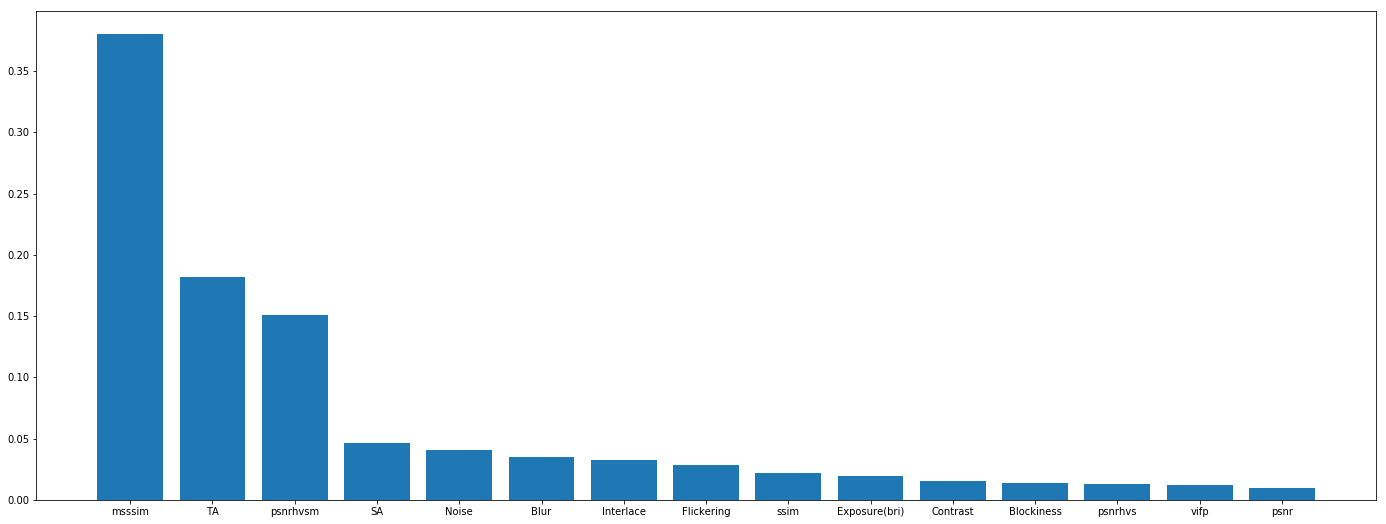

In [141]:
fig, ax = plt.subplots(figsize = (24, 9))
ax.bar(feature_importance.index, feature_importance['Weight'])
plt.tight_layout

In [142]:
features_augment = features.loc[:,['msssim', 'TA', 'psnrhvsm']]